In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import shutil

## Cleaning Data
Assuming you have downloaded the raw data files from https://zenodo.org/record/3451402#.YoMCp5PMLtX into a directory called `raw_data`, we can use the `clean_data.py` script to clean the datasets into a more workable format and place those CSVs in a directory called `cleaned_data`.

`clean_data.py` will also combine each of those files (where one file corresponds to a single trial) into one dataframe with a trial identifier and write that dataframe to `cleaned_data/[game_name]/combined.csv`

In [2]:
from utils.clean_data import clean_all_raw_data, extract_images, ravel_images

In [3]:
GAME = 'ms_pacman'
parent_dir = 'raw_data'
target_dir = 'cleaned_data'

# if the data has already been cleaned, skip and just use filepath instead
if os.path.exists(os.path.join("cleaned_data", GAME, "combined.csv")):
    combined_fp = os.path.join("cleaned_data", GAME, "combined.csv")
else:
    combined_fp = clean_all_raw_data(parent_dir,target_dir,GAME)

In [4]:
full_df = pd.read_csv(combined_fp)

In [5]:
full_df.shape

(17541021, 9)

In [6]:
# if the images have already been extracted, skip and just use filepath instead
if os.path.exists(os.path.join(target_dir, GAME, "all_images")):
    image_dir = os.path.join(target_dir, GAME, "all_images")
else:
    image_dir = extract_images(parent_dir,target_dir,GAME)

In [7]:
# "ravel" puts the image information into an array we can use later for PCA
if os.path.exists(os.path.join(image_dir, "ravelled_image_data.csv")):
    image_file = os.path.join(image_dir, "ravelled_image_data.csv")
else:
    image_file = image_file = ravel_images(image_dir)

In [9]:
## THIS CELL WILL DELETE A LOT OF STUFF
## will retain two csvs, 
##   one for the combined clean text data and one for the combined image ravelled data,
## but will delete all the other data files.
## recommended to conserve memory and space, but you've been warned
if os.path.exists('final_data'):
    pass
else:
    os.mkdir('final_data')
shutil.move('cleaned_data/ms_pacman/combined.csv', 'final_data/ms_pacman_combined.csv')
shutil.move('cleaned_data/ms_pacman/all_images/ravelled_image_data.txt','final_data/ms_pacman_ravelled_images.csv')

shutil.rmtree('raw_data')
shutil.rmtree('cleaned_data')
shutil.rmtree('extraction')

## EDA

*Below variable descriptions adapted from the ones available at https://zenodo.org/record/3451402#.YoMCp5PMLtX*
- `frame_id`: String. The ID of a frame, can be used to locate the corresponding image frame in .tar.bz2 file
- `score`: Integer. Current game score for that frame.
- `duration`(ms): Integer. Time elapsed until the human player made a decision.
- `unclipped_reward`: Integer. Immediate reward returned by the game engine.
- `action_int`: Integer. Mapped integers for action taken by the human player. This is consistent with the Arcade Learning Environment setup.
- `action_str`: String. Mapped strings for action taken by the human player.
- `gaze_position_x`: Float. X coordinate (horizontal axis) for the current gaze position. (0,0) is the bottom-left corner.
- `gaze_position_y`: Float. Y coordinate (vertical axis) for the current gaze position. (0,0) is the bottom-left corner.
- `trial_id`: String. Trial identifier extracted from original file name. One trial corresponds to 15 minutes of gameplay.

In [7]:
full_df.head()

,frame_id,score,duration,unclipped_reward,action_int,gaze_position_x,gaze_position_y,action_str,trial_id
0,RZ_3279899_1,0.0,1160,0,4,80.39,106.97,PLAYER_A_LEFT,273_RZ_3279899
1,RZ_3279899_1,0.0,1160,0,4,80.31,107.12,PLAYER_A_LEFT,273_RZ_3279899
2,RZ_3279899_1,0.0,1160,0,4,80.22,107.20,PLAYER_A_LEFT,273_RZ_3279899
3,RZ_3279899_1,0.0,1160,0,4,80.15,107.22,PLAYER_A_LEFT,273_RZ_3279899
4,RZ_3279899_1,0.0,1160,0,4,80.16,107.20,PLAYER_A_LEFT,273_RZ_3279899


In [8]:
# the dataset in full is fairly large so take a random sample for some inital EDA
sample_df = full_df.sample(frac=0.2)
sample_df.shape

(3508204, 9)

In [13]:
single_trial = sample_df[sample_df.trial_id=='202_RZ_4051421']

array(['RZ_4051421_355', 'RZ_4051421_5397', 'RZ_4051421_7896', ...,
       'RZ_4051421_8258', 'RZ_4051421_13058', 'RZ_4051421_4197'],
      dtype=object)

In [17]:
single_frame = single_trial[single_trial.frame_id == 'RZ_4051421_355']
single_frame

,frame_id,score,duration,unclipped_reward,action_int,gaze_position_x,gaze_position_y,action_str,trial_id
1793435,RZ_4051421_355,70.0,51,0,3,58.42,117.38,PLAYER_A_RIGHT,202_RZ_4051421
1793452,RZ_4051421_355,70.0,51,0,3,58.41,116.85,PLAYER_A_RIGHT,202_RZ_4051421
1793422,RZ_4051421_355,70.0,51,0,3,58.48,117.33,PLAYER_A_RIGHT,202_RZ_4051421
1793445,RZ_4051421_355,70.0,51,0,3,58.44,117.15,PLAYER_A_RIGHT,202_RZ_4051421
1793404,RZ_4051421_355,70.0,51,0,3,58.46,117.25,PLAYER_A_RIGHT,202_RZ_4051421
1793437,RZ_4051421_355,70.0,51,0,3,58.41,117.45,PLAYER_A_RIGHT,202_RZ_4051421
1793411,RZ_4051421_355,70.0,51,0,3,58.51,117.53,PLAYER_A_RIGHT,202_RZ_4051421
1793426,RZ_4051421_355,70.0,51,0,3,58.50,117.00,PLAYER_A_RIGHT,202_RZ_4051421
1793434,RZ_4051421_355,70.0,51,0,3,58.41,117.33,PLAYER_A_RIGHT,202_RZ_4051421
1793408,RZ_4051421_355,70.0,51,0,3,58.58,117.42,PLAYER_A_RIGHT,202_RZ_4051421


In [21]:
full_df.gaze_position_y.max()

419.12

In [57]:
len(full_df.frame_id.unique())

348511

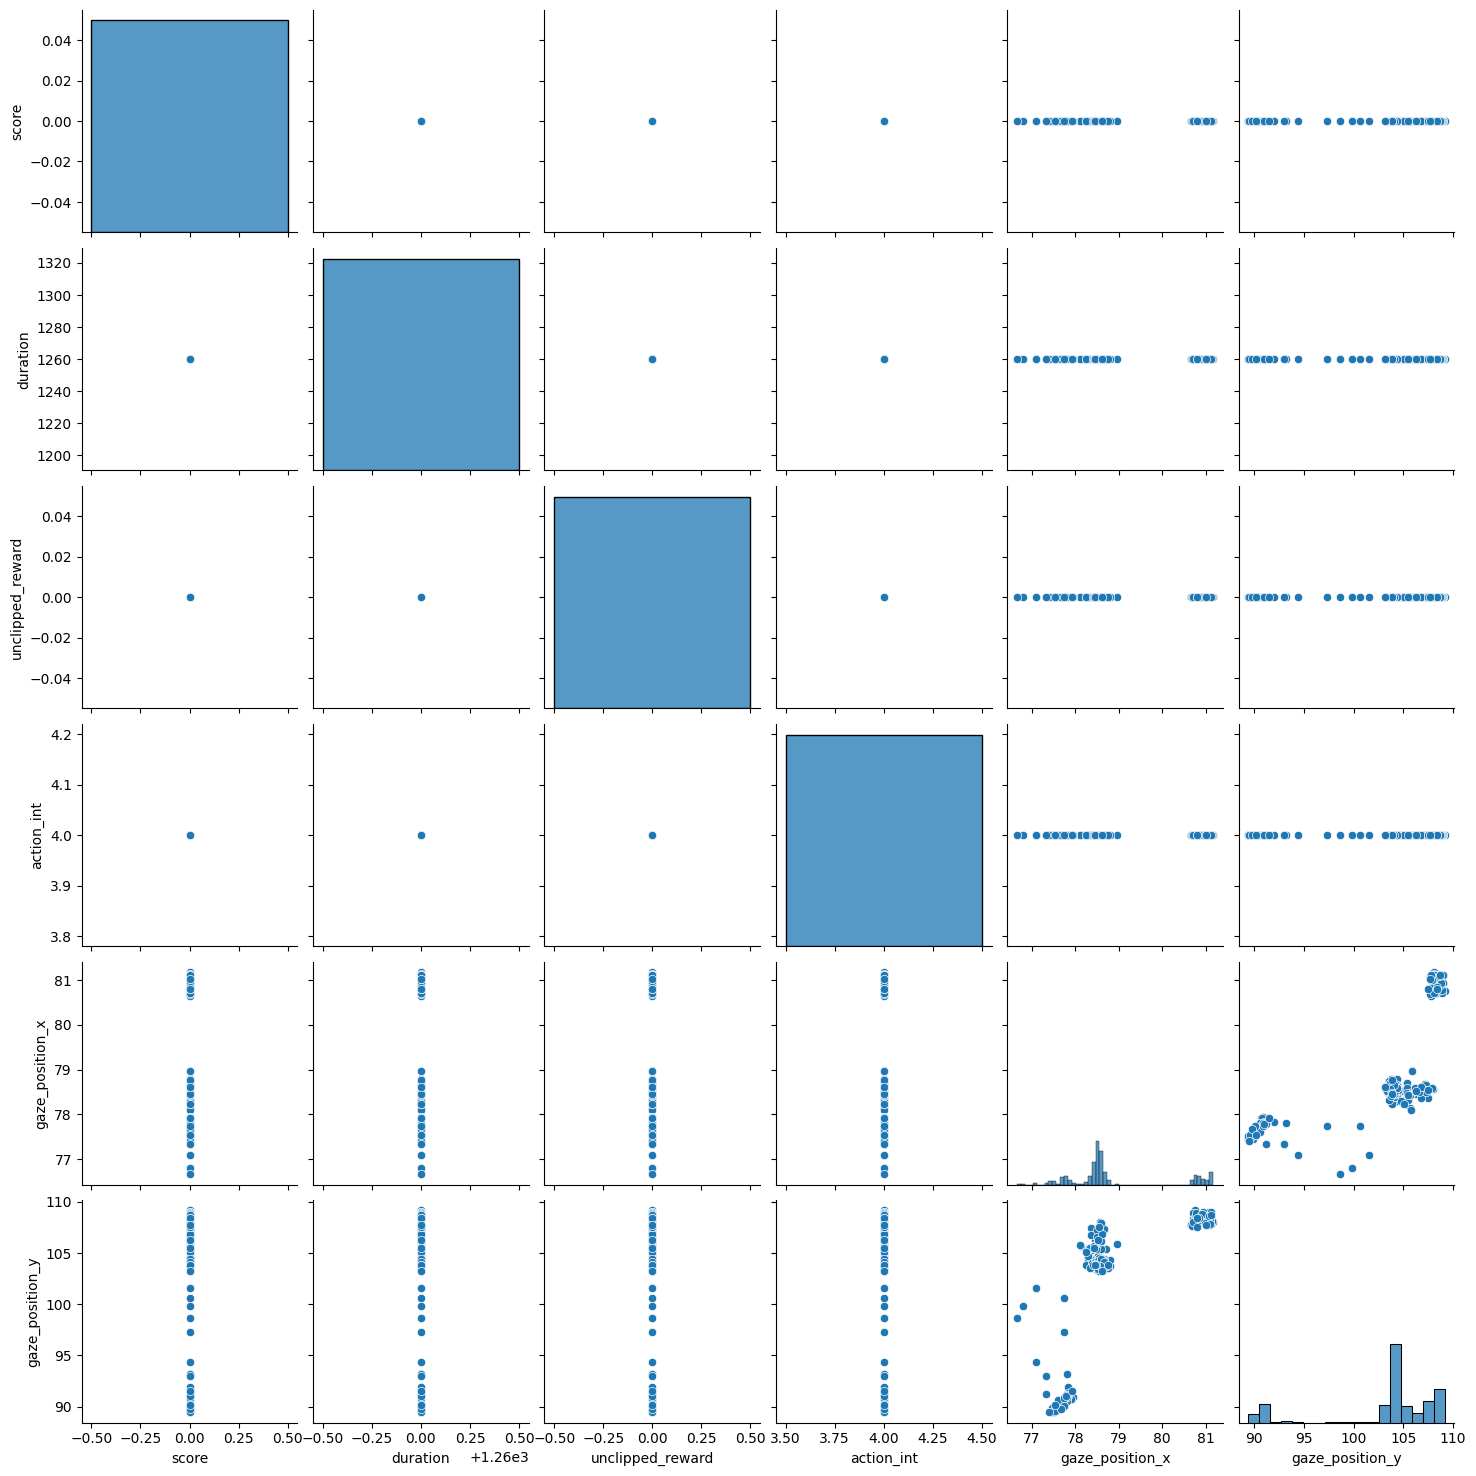

In [53]:
vc = single_trial.frame_id.value_counts().head(20)
data = single_trial[single_trial.frame_id == vc.keys()[0]]
sns.pairplot(data)

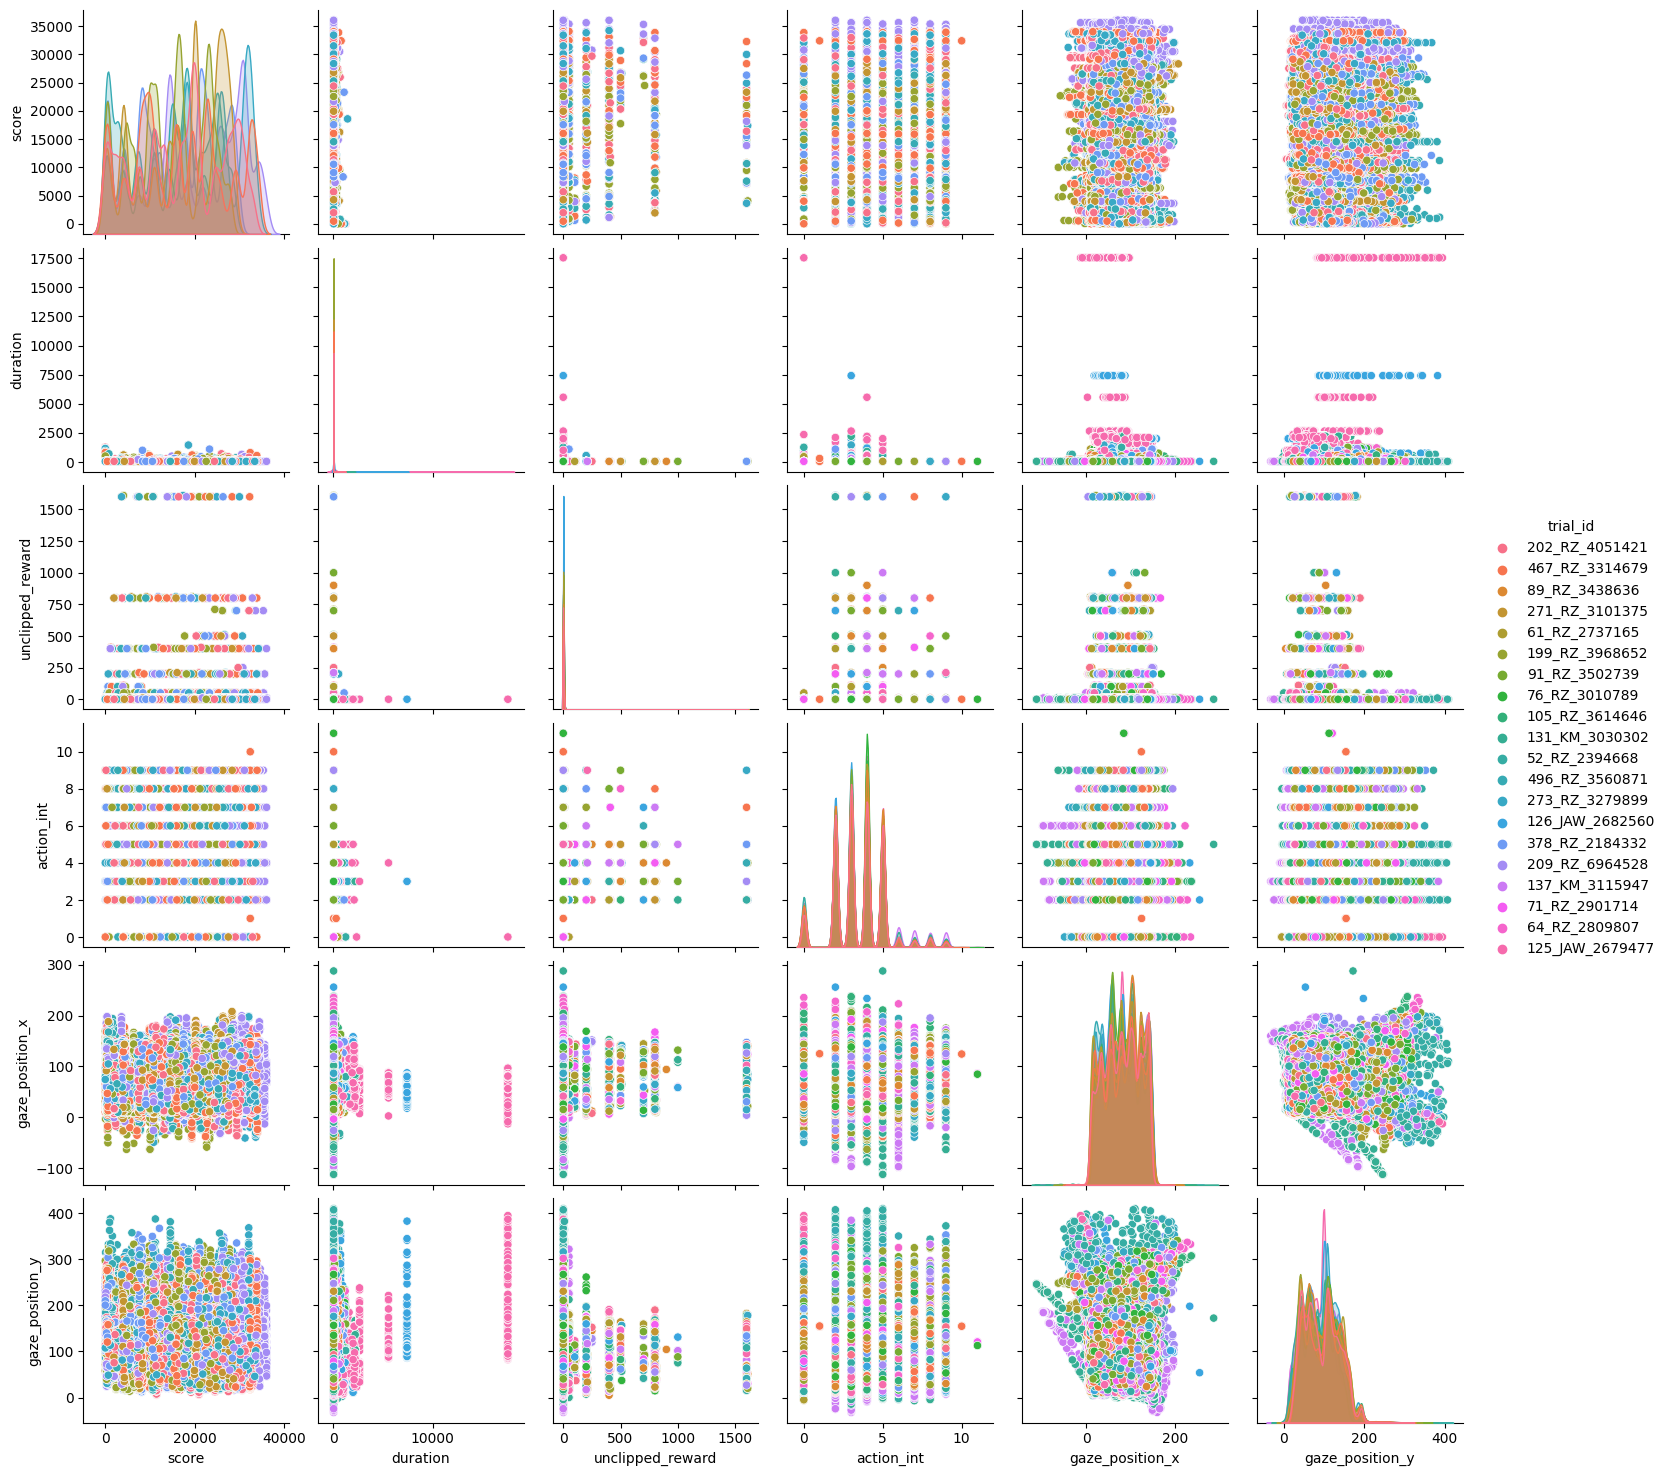

In [54]:
sns.pairplot(sample_df,hue='trial_id')
# there ends up still being too much going to really see anything here

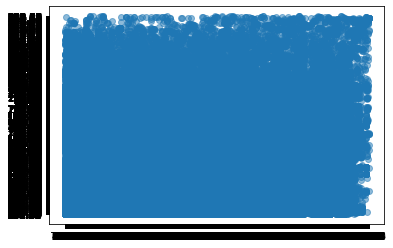

In [41]:
plt.scatter(df.gaze_position_x, df.gaze_position_y, cmap=df.action, alpha=0.5)

<AxesSubplot:xlabel='gaze_position_x', ylabel='gaze_position_y'>

/Users/nicolebasinski/.pyenv/versions/3.8.13/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nicolebasinski/.pyenv/versions/3.8.13/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nicolebasinski/.pyenv/versions/3.8.13/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nicolebasinski/.pyenv/versions/3.8.13/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nicolebasinski/.pyenv/versions/3.8.13/lib/python3.8/site-packages

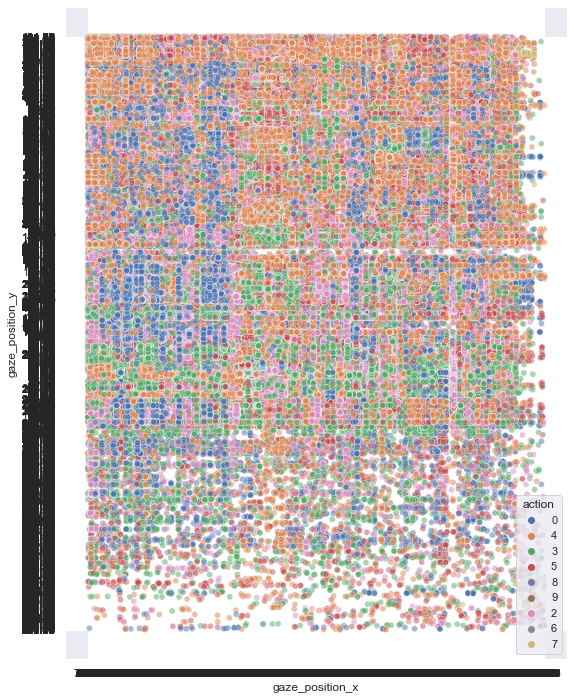

In [44]:
# sns.set(rc={'figure.figsize':(9,12)})
# sns.scatterplot(x=df.gaze_position_x, y=df.gaze_position_y, hue=df.action, alpha=0.5)